# TP2 - Machine Leaning 2
---
MOUSSA DIEME ISE 2

>Consigne 
 - Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc) 
- Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)
-  Tester avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)
- Faire l'analyse des personnas pour le meilleur modèle
- Montrer la visualisation et l'analyse des clusters choisies (Avec t-sne par exemple)
---


## Import librairies

In [72]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer


## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [73]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [74]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## EDA

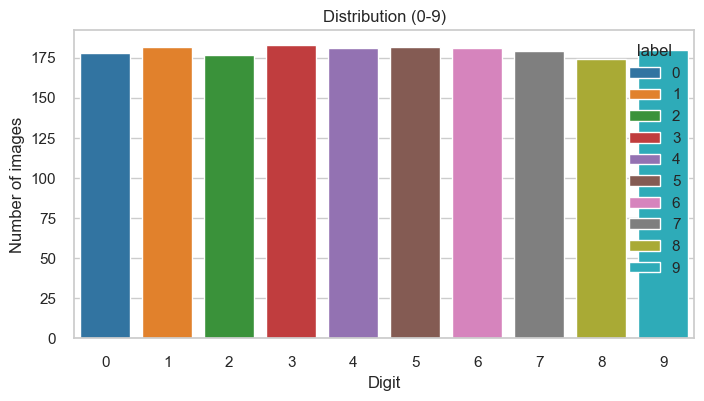

In [75]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, hue='label', palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

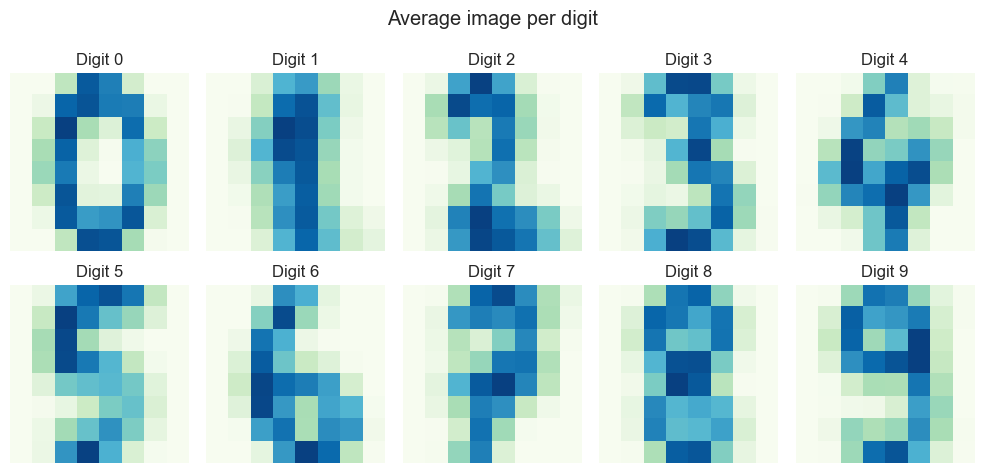

In [76]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='GnBu')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

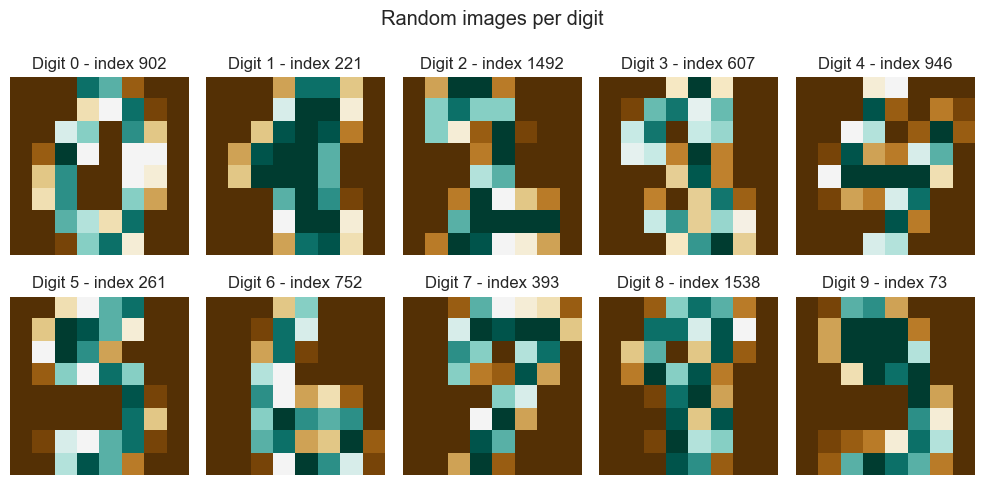

In [77]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='BrBG')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

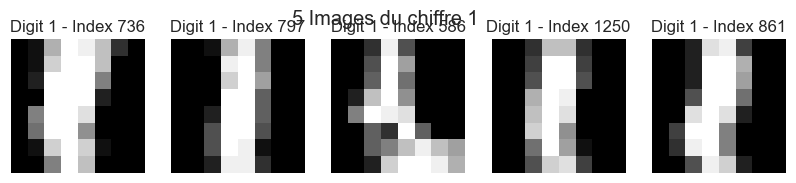

In [78]:
def show_digit_images(digit, n=5):
    """
    Affiche n images d'un chiffre spécifique du dataset digits.

    Paramètres :
    - digit : le chiffre à afficher (de 0 à 9).
    - n : nombre d'images à afficher.
    """
    idxs = np.random.choice(np.where(labels == digit)[0], size=n, replace=False)
    
    fig, axs = plt.subplots(1, n, figsize=(n*2, 2))
    for i, idx in enumerate(idxs):
        axs[i].imshow(images[idx], cmap='gray')
        axs[i].set_title(f"Digit {digit} - Index {idx}")
        axs[i].axis('off')

    plt.suptitle(f"{n} Images du chiffre {digit}")
    plt.show()

show_digit_images(1, n=5)

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [79]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=1797,
        )
    ]
    

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [80]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=7, random_state=221)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=7, random_state=221)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

pca = PCA(n_components=n_digits).fit(X)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=X, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.092s	4648	0.738	0.746	0.742	0.668	0.183
random   	0.052s	4647	0.741	0.750	0.745	0.669	0.183
PCA-based	0.016s	4647	0.744	0.753	0.749	0.673	0.183
__________________________________________________________________________________


## Optimal number of clusters

In [81]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

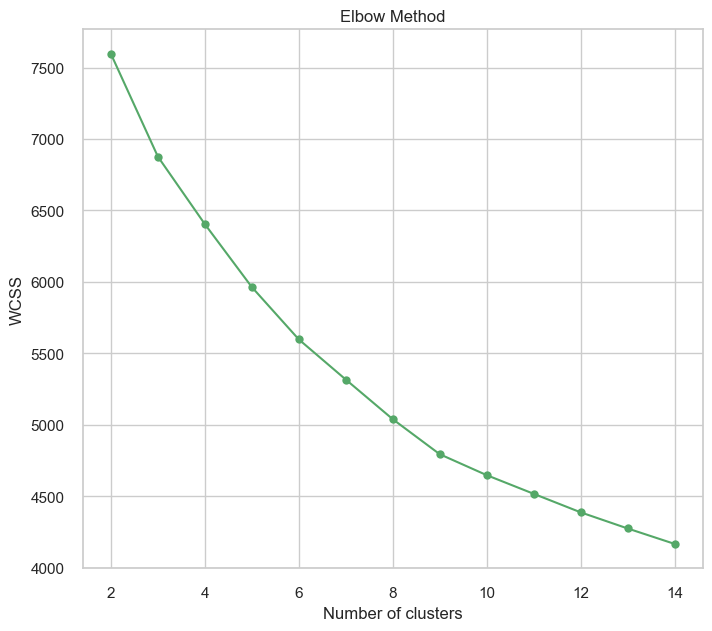

In [82]:
wcss = []  # Within-Cluster Sum of Squares 

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

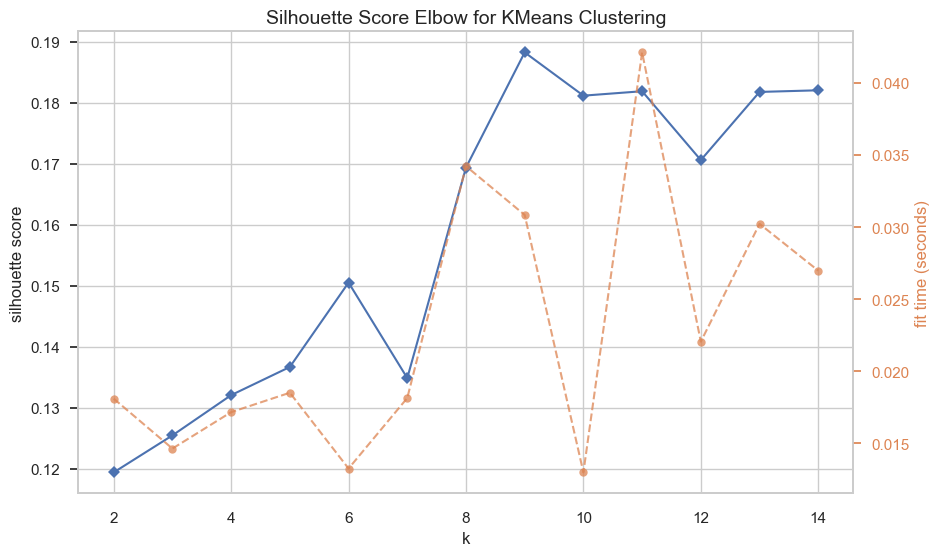

In [114]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion

        
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [84]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [85]:
pd.DataFrame(reduced_data).head()

,0,1
0,-1.259466,-21.274883
1,7.957611,20.768699
2,6.991923,9.955986
3,-15.906105,-3.332464
4,23.306867,-4.269061


In [86]:
data["cluster"] = kmean_labels
data[['label','cluster']].head()

,label,cluster
0,0,2
1,1,3
2,2,9
3,3,8
4,4,1


In [87]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,0,113,49,0,4,0,0,3,9
1,1,4,0,0,144,2,21,1,1,0
2,160,0,0,0,0,5,8,0,0,0
3,0,86,0,0,5,0,0,21,4,0
4,1,28,36,10,0,44,0,1,71,16
5,4,7,4,21,0,49,0,0,10,78
6,12,0,0,0,24,5,150,0,0,1
7,0,9,12,13,3,26,0,117,24,9
8,0,0,0,90,0,0,0,0,0,57


In [88]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    2
1    4
2    0
3    1
4    8
5    9
6    6
7    7
8    3
9    8
dtype: int64


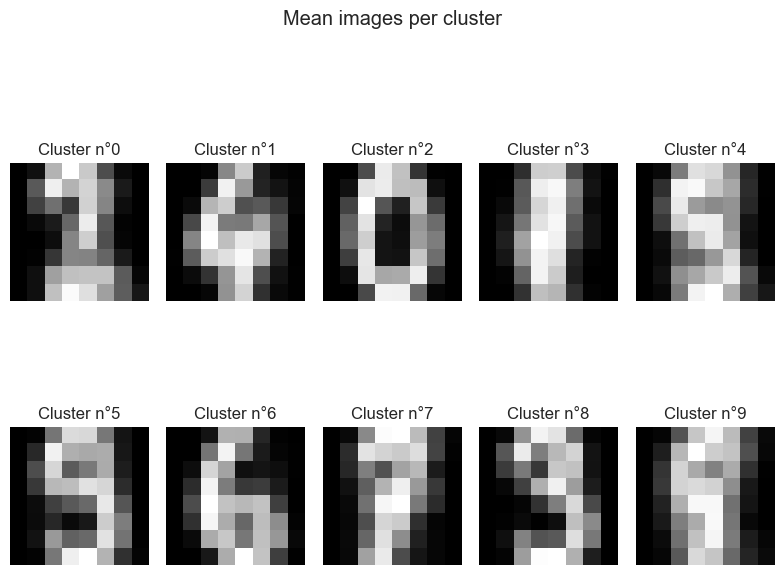

In [89]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)
    
    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')
    
plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

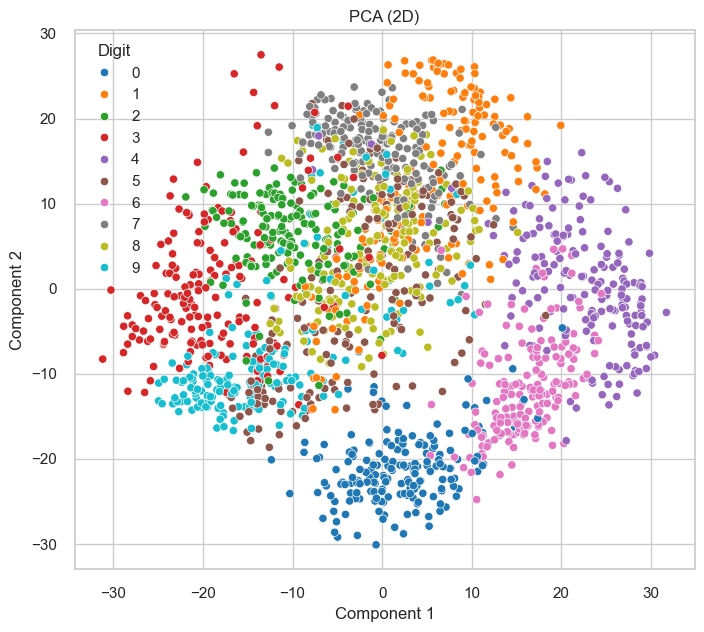

In [90]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


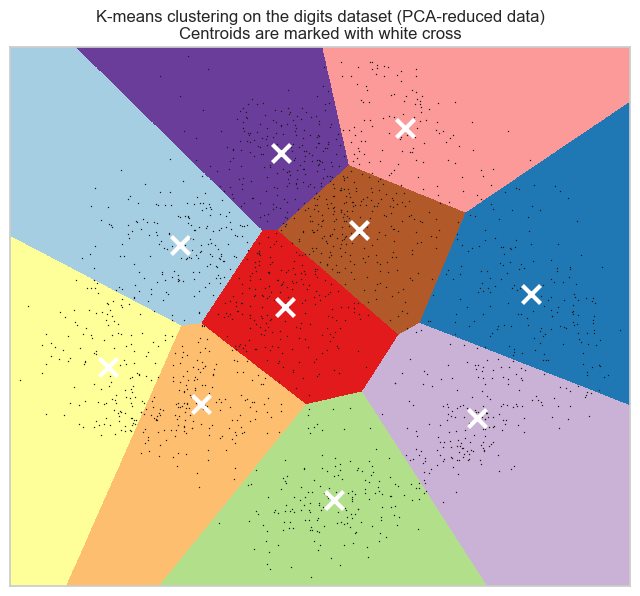

In [91]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

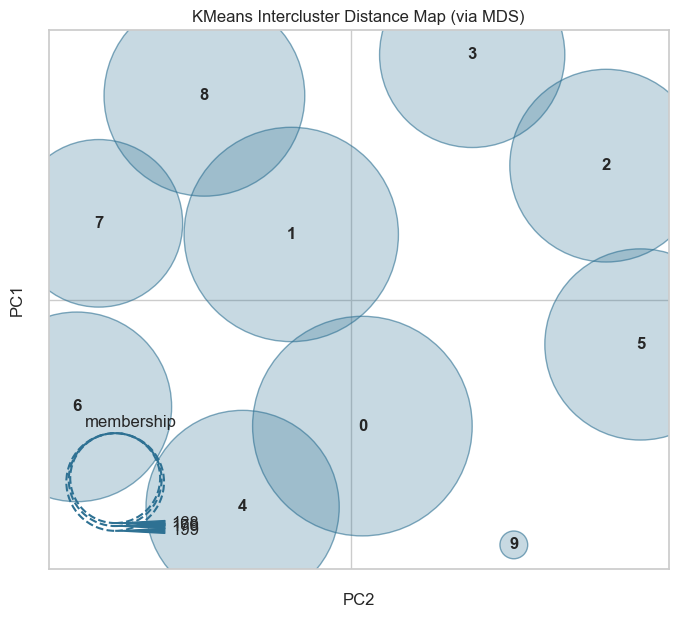

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [92]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [93]:
# Initialize

from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


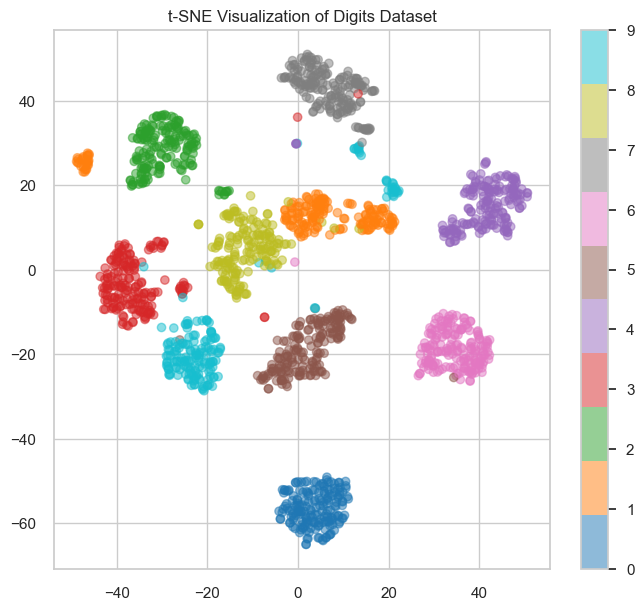

In [94]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of Digits Dataset")
plt.show()

---

# TP --- 
>Ma contribution

In [116]:
from sklearn.metrics import silhouette_score


## Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc) 

In [ ]:
# Nous allons legerement modifier bench_k_mean pour  y inclure un return afin de capter ses sorties
# output : une liste
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=1797, # On prend tous le monde
        )
    ]
    

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))
    return results
    

In [98]:
from sklearn.model_selection import ParameterGrid

# Standardisation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Les parametres à optimiser
param_grid = {
    'n_clusters': [10,11],## 10 ou 11 mais de preference on ne gardera que ceux avec 10
    'n_init': [5,10,15,20],
    'init': ['k-means++','random'],
    'max_iter': [100,200,300,400,500],
    'tol': [1e-3, 1e-5, 1e-6,1e-7]
}
all_results = []
for params in ParameterGrid(param_grid):
    kmeans = KMeans(random_state=221, **params)
    name = (
        f"k={params['n_clusters']}, init={params['init']}, "
        f"n_init={params['n_init']}, max_iter={params['max_iter']}, tol={params['tol']}"
    )
    res = bench_k_means(kmeans, name, X, labels)
    all_results.append({"params": params, "results": res})

df = pd.DataFrame(all_results)


k=10, init=k-means++, n_init=5, max_iter=100, tol=0.001	0.081s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=5, max_iter=100, tol=1e-05	0.080s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=5, max_iter=100, tol=1e-06	0.072s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=5, max_iter=100, tol=1e-07	0.074s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=10, max_iter=100, tol=0.001	0.143s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=10, max_iter=100, tol=1e-05	0.102s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=10, max_iter=100, tol=1e-06	0.126s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=10, max_iter=100, tol=1e-07	0.124s	4648	0.738	0.746	0.742	0.668	0.183
k=10, init=k-means++, n_init=15, max_iter=100, tol=0.001	0.183s	4647	0.741	0.750	0.746	0.673	0.183
k=10, init=k-means++, n_init=15, max_iter=100, tol=1e-05	0.173s	4647	0.741	0.750	0.746	0.673	0.183
k=10, init=k-m

In [99]:
df.iloc[0]['params']

{'init': 'k-means++',
 'max_iter': 100,
 'n_clusters': 10,
 'n_init': 5,
 'tol': 0.001}

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_results(df):
    """
    Transforme la colonne df['results'] (liste) en DataFrame 
    """
    cols = [
        "name",       
        "fit_time",
        "inertia",
        "homogeneity",
        "completeness",
        "v_measure",
        "ari",
        "silhouette",
    ]
    return pd.DataFrame(df["results"].tolist(), columns=cols)

#  Fusion avec les hyperparamètres
def build_viz_df(df, results_df):
    """
    Concatène params (dict) et résultats (DataFrame) en un seul DataFrame.
    """
    params_df = df["params"].apply(pd.Series)
    return pd.concat([params_df, results_df], axis=1)


results_df = extract_results(df)
df_viz      = build_viz_df(df, results_df)


In [101]:
df_viz.head()

,init,max_iter,n_clusters,n_init,tol,name,fit_time,inertia,homogeneity,completeness,v_measure,ari,silhouette
0,k-means++,100,10,5,1.000000e-03,"k=10, init=k-means++, n_init=5, max_iter=100, ...",0.080804,4647.625572,0.737868,0.746133,0.741978,0.667519,0.182566
1,k-means++,100,10,5,1.000000e-05,"k=10, init=k-means++, n_init=5, max_iter=100, ...",0.079883,4647.625572,0.737868,0.746133,0.741978,0.667519,0.182566
2,k-means++,100,10,5,1.000000e-06,"k=10, init=k-means++, n_init=5, max_iter=100, ...",0.071903,4647.625572,0.737868,0.746133,0.741978,0.667519,0.182566
3,k-means++,100,10,5,1.000000e-07,"k=10, init=k-means++, n_init=5, max_iter=100, ...",0.073538,4647.625572,0.737868,0.746133,0.741978,0.667519,0.182566
4,k-means++,100,10,10,1.000000e-03,"k=10, init=k-means++, n_init=10, max_iter=100,...",0.142811,4647.625572,0.737868,0.746133,0.741978,0.667519,0.182566


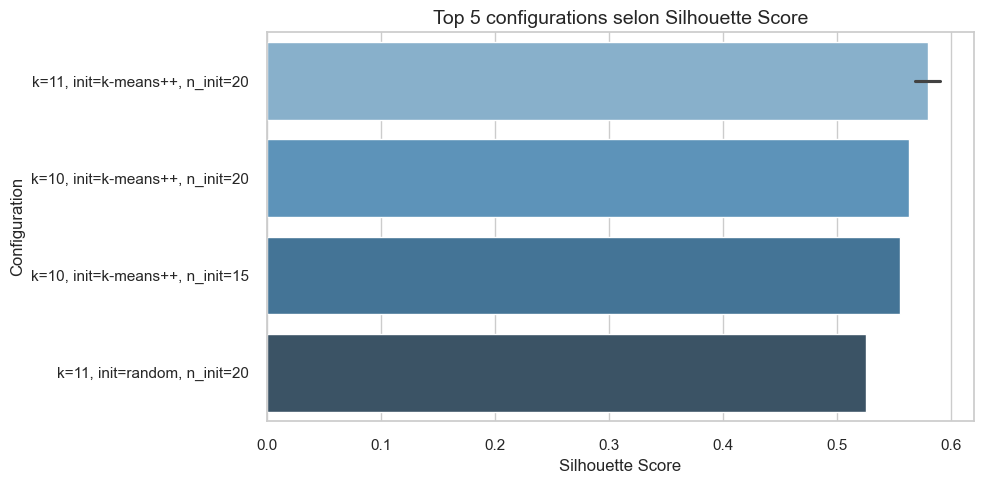

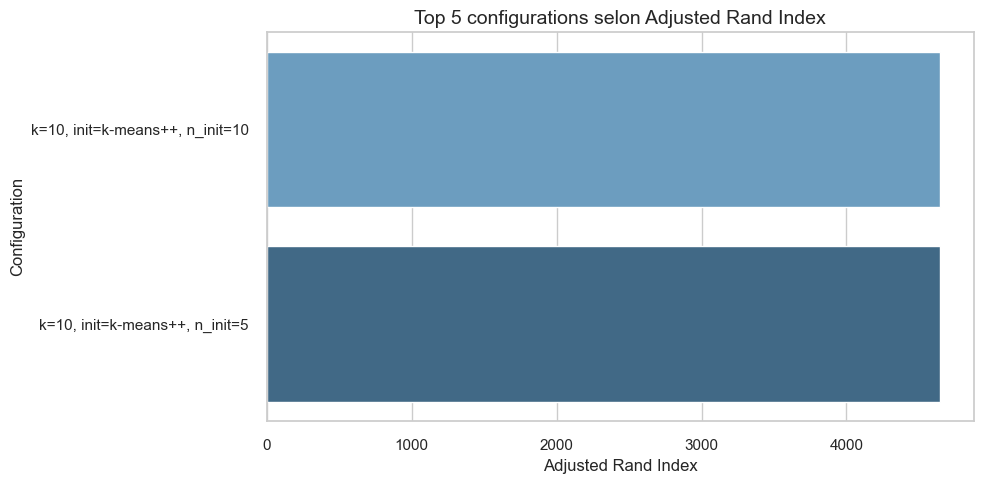

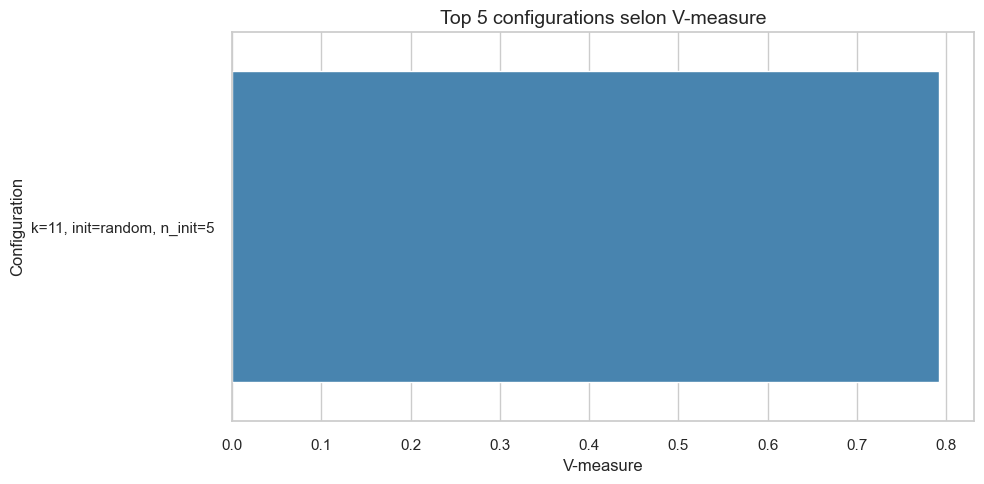

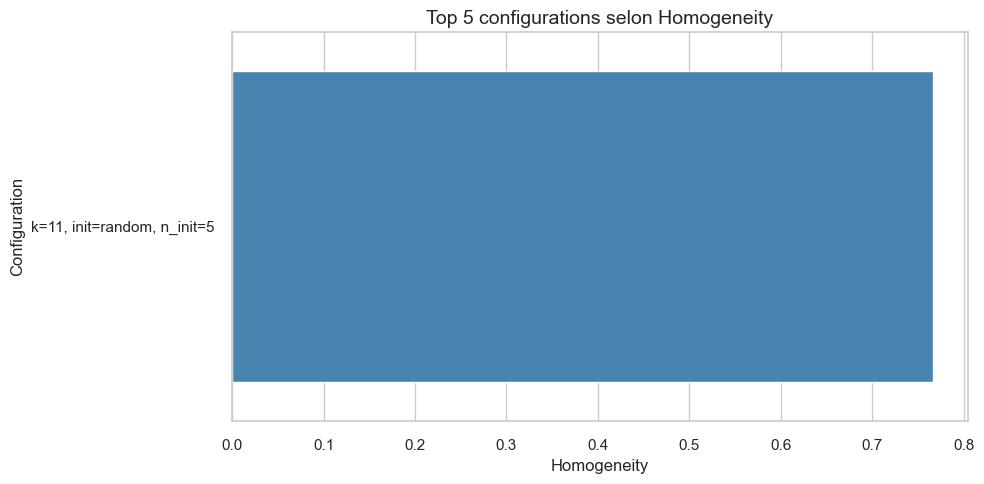

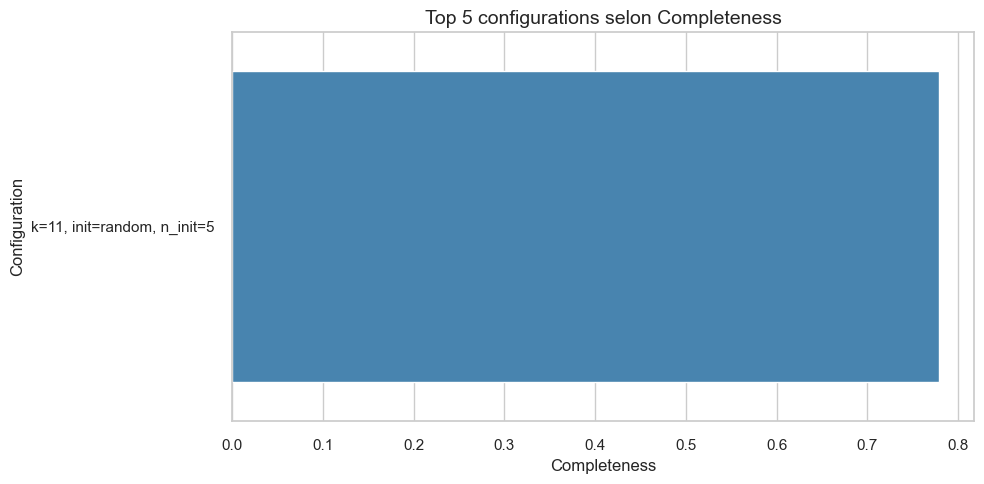

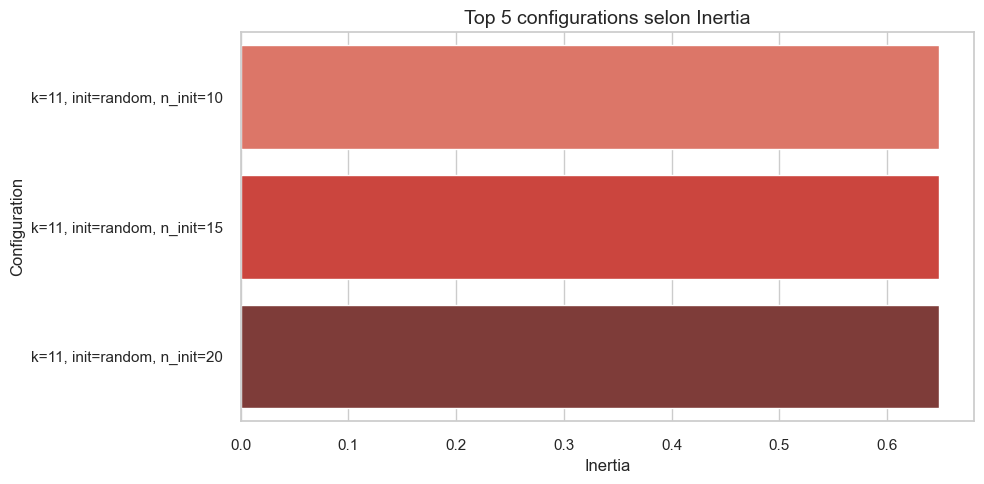

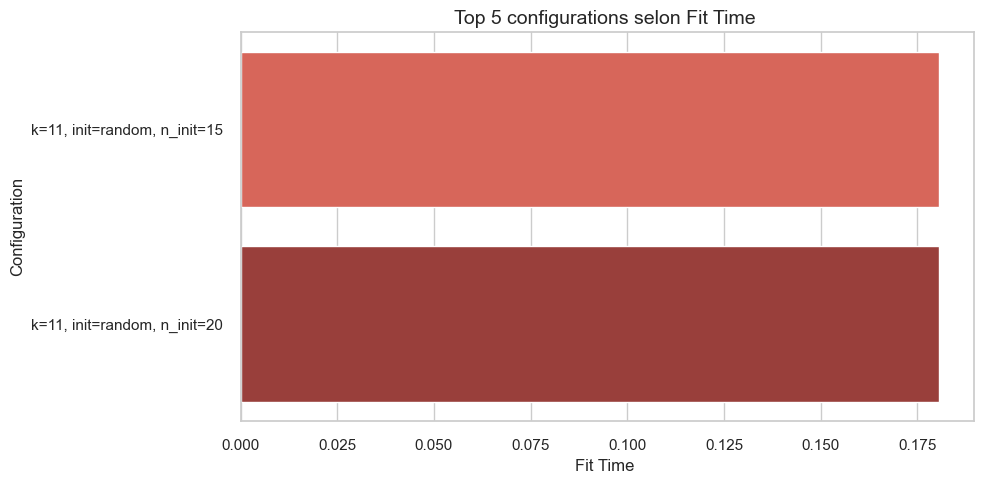

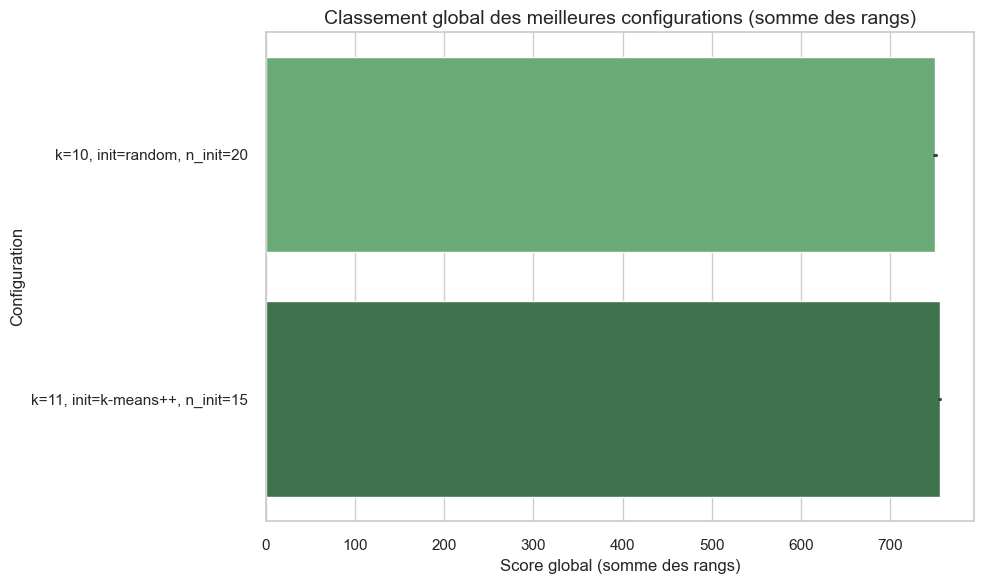

In [111]:
# Si il y a des exequo alors seul le premier est affiche ce qui fait qu'on a pas systematiquement 5 graphiques
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

#  métriques et sens d'optimisation
# True si l'on veux minimiser
metrics_info = {
    "silhouette":    {"ascending": False, "label": "Silhouette Score"},
    "ari":           {"ascending": False, "label": "Adjusted Rand Index"},
    "v_measure":     {"ascending": False, "label": "V-measure"},
    "homogeneity":   {"ascending": False, "label": "Homogeneity"},
    "completeness":  {"ascending": False, "label": "Completeness"},
    "inertia":       {"ascending": True,  "label": "Inertia"},
    "fit_time":      {"ascending": True,  "label": "Fit Time "}
}

top_n = 5
metrics_cols = list(metrics_info.keys())
results_df = pd.DataFrame(df["results"].tolist(), columns=["name"] + metrics_cols)
params_df = df["params"].apply(pd.Series)
df_viz = pd.concat([params_df, results_df], axis=1)

# afficher les top configurations
def plot_top_configs(metric, label, ascending):
    threshold = df_viz[metric].sort_values(ascending=ascending).iloc[top_n - 1]
    if ascending:
        top_df = df_viz[df_viz[metric] <= threshold].copy()
    else:
        top_df = df_viz[df_viz[metric] >= threshold].copy()

    top_df["config"] = top_df.apply(
        lambda row: f"k={row['n_clusters']}, init={row['init']}, n_init={row['n_init']}", axis=1
    )
    
    # Tracé
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=top_df,
        y="config",
        hue="config",
        x=metric,
        palette="Blues_d" if not ascending else "Reds_d"
    )
    plt.title(f"Top {top_n} configurations selon {label}")
    plt.xlabel(label)
    plt.ylabel("Configuration")
    plt.tight_layout()
    plt.show()

for metric, info in metrics_info.items():
    plot_top_configs(metric, info["label"], info["ascending"])

# Création d’un tableau de rangs pour toutes les métriques
ranks = pd.DataFrame(index=df_viz.index)

for metric, info in metrics_info.items():
    ranks[metric] = df_viz[metric].rank(ascending=info["ascending"], method="min")


# Ajout des paramètres pour identification
ranks["config"] = df_viz.apply(
    lambda row: f"k={row['n_clusters']}, init={row['init']}, n_init={row['n_init']}", axis=1
)

# Calcul du score global : somme des rangs
# Une configuration qui est la meilleure sur une métrique obtient le rang 1, la 2iem le rang 2, etc

ranks["total_rank"] = ranks[list(metrics_info.keys())].sum(axis=1)
ranks_sorted = ranks.sort_values("total_rank").reset_index(drop=True)


# Visualisation des performances globales
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranks_sorted.head(top_n),
    y="config",
    hue='config',
    x="total_rank",
    palette="Greens_d"
)
plt.title("Classement global des meilleures configurations (somme des rangs)")
plt.xlabel("Score global (somme des rangs)")
plt.ylabel("Configuration")
plt.tight_layout()
plt.show()


In [112]:
#Top 5 global
print("Top 5 configurations globales (selon la somme des rangs sur toutes les métriques)")
display(ranks_sorted[["config", "total_rank"] + list(metrics_info.keys())].head(top_n))


Top 5 configurations globales (selon la somme des rangs sur toutes les métriques)


,config,total_rank,silhouette,ari,v_measure,homogeneity,completeness,inertia,fit_time
0,"k=10, init=random, n_init=20",749.0,50.0,101.0,161.0,101.0,101.0,141.0,94.0
1,"k=10, init=random, n_init=20",750.0,51.0,101.0,161.0,101.0,101.0,141.0,94.0
2,"k=10, init=random, n_init=20",752.0,53.0,101.0,161.0,101.0,101.0,141.0,94.0
3,"k=11, init=k-means++, n_init=15",755.0,9.0,241.0,21.0,21.0,21.0,241.0,201.0
4,"k=11, init=k-means++, n_init=15",756.0,10.0,241.0,21.0,21.0,21.0,241.0,201.0


In [113]:
best_config = ranks_sorted.iloc[0] 
best_config

silhouette                              50.0
ari                                    101.0
v_measure                              161.0
homogeneity                            101.0
completeness                           101.0
inertia                                141.0
fit_time                                94.0
config          k=10, init=random, n_init=20
total_rank                             749.0
Name: 0, dtype: object

Si on accorde le même poids à toutes les métriques, on obtient des clusters avec un score de silhouette de 50, ce qui est plutôt faible.les groupes formés ne sont pas  bien séparés et  certains points pourraient être mal placés, ce qui entraîne un chevauchement entre les clusters.

Même si la séparation spatiale n’est pas parfaite, la structure globale des groupes fait du sens et correspond assez bien aux vraies classes. 
malgré cela, le score ari de 101 montre que la structure des clusters est assez cohérente avec les classes réelles, ce qui signifie que le regroupement est pertinent, même si spatialement il manque un peu de précision
le score de v-measure de 161 indique que l'homogénéité et la complétude sont bonnes, ce qui signifie que les clusters contiennent des points ayant des caractéristiques similaires et regroupent correctement les éléments d'une même classe
l'homogénéité et la complétude, toutes deux à 101, renforcent cette idée en démontrant que chaque cluster est bien défini et que les données proches en termes de caractéristiques sont bien regroupées .l'inertie, qui est de 141, montre que la dispersion des points autour des centres de clusters est modérée, ce qui peut expliquer pourquoi la séparation n'est pas parfaite. une inertie plus basse pourrait indiquer des groupes plus denses et mieux structurés.

globalement, même si le score de silhouette suggère que la séparation entre les clusters pourrait être améliorée, les autres métriques indiquent une bonne cohérence interne et une structuration efficace des données. Pour aller plus loins nous pouvons revenir sur le nombre de cluster que nous avons volontier fixé entre 10 et 11 pour cause de connaissance sur le dataset.



# - Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)

Nous allons refaire l'optimisation mais avec PCA sans chercher à visualiser nos données 